Loading Data in Pandas DataFrame format
Use nrows to limit data analise to get faster (but limited) results. If you wan all data put a huge value in this var.

In [1]:
import pandas as pd
from Util import loadJson,loadCsv,saveJson

nrows = -1 #10000
data1 = loadJson('H-DHT11-measures.json','H-DHT11',nrows);
data2 = loadCsv('T-DHT11-measures.csv','T-DHT11',nrows);

As we make an outer join we can view that some rows no has value on same time on each other.

In [2]:
data= data1.join(data2.set_index('time'), on='time', how='outer', sort=True )
print(data.isna().sum())

data= data1.join(data2.set_index('time'), on='time', how='inner', sort=True )
print(data.isna().sum())


H-DHT11    81572
time           0
T-DHT11    81567
dtype: int64
H-DHT11    0
time       0
T-DHT11    0
dtype: int64


We can view graphically that holes in data are common for H and T data. But, data that are registred is correct.
In H-DHT11-measures Jupiterbook are analized the holes of data.


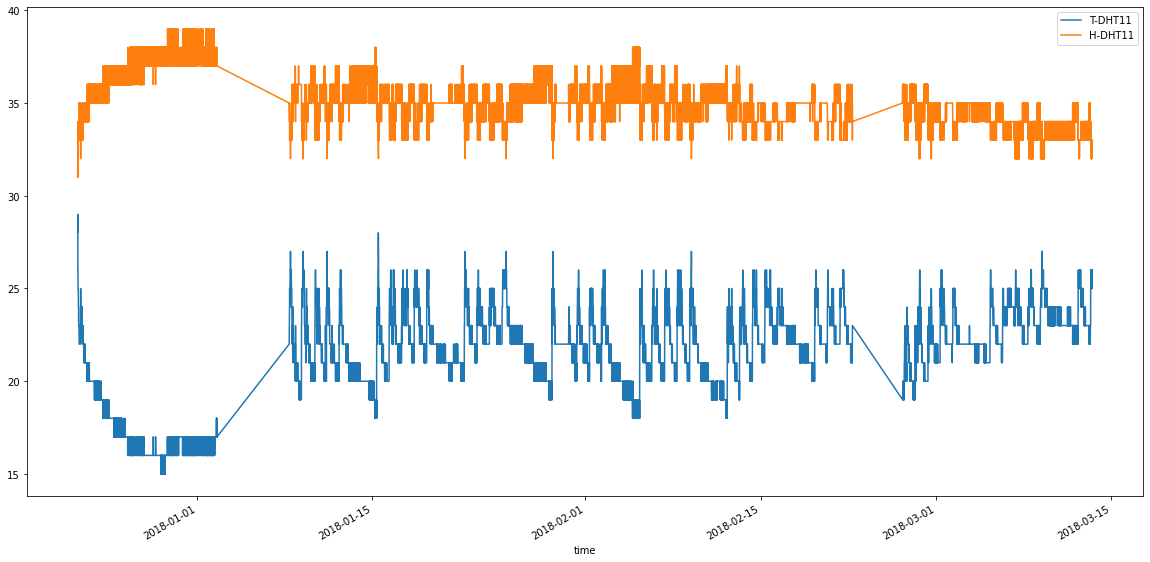

In [3]:
data.describe()
data.plot.line(x = 'time',figsize=(20,10))

Finally, we save data combined to further use

In [4]:
saveJson("DHT11-measures.json", data)